# Importing all the required Libraries and Reading the dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ShreyasDasari/Data-Science-and-ML/main/social_data.csv')
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [ ]:
df.shape

(3479, 7)

# Question 1: What is the typical engagement rate we can expect? What’s the likelihood that we can achieve a 15% engagement rate?

In [ ]:
# Calculate the likelihood of achieving a 15% engagement rate
likelihood_15_percent = (df['Total Engagements'] >= 15).mean() * 100

# Display the likelihood
print("Likelihood of achieving a 15% engagement rate:")
print(likelihood_15_percent)

Likelihood of achieving a 15% engagement rate:
60.5921241736131


Here, we assess the percentage of engagement rates that are greater than or equal to 15% in order to determine the likelihood. This percentage can be multiplied by 100 to get the likelihood as a percentage.

Using the above dataset, we can execute this code to determine the normal engagement rate and the likelihood of obtaining a 15% engagement rate. We can better comprehend the data and estimate engagement rates with the aid of these revelations.

In [ ]:
df.head()

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [ ]:
# Summary statistics
print(df.describe())

       Total Impressions  Total Engagements
count        3479.000000        3479.000000
mean        10972.453579         947.390629
std         29577.108063        3468.628038
min             0.000000           0.000000
25%           167.000000           0.000000
50%          1884.000000          39.000000
75%         12467.000000         276.500000
max        753227.000000       95062.000000


In [ ]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     3479 non-null   object
 1   Account            3479 non-null   object
 2   Account Type       3479 non-null   object
 3   Campaign Name      3479 non-null   object
 4   Total Impressions  3479 non-null   int64 
 5   Total Engagements  3479 non-null   int64 
 6   Media Type         3479 non-null   object
dtypes: int64(2), object(5)
memory usage: 190.4+ KB
None


In [ ]:
# Unique values in categorical columns
print('Account', df['Account'].unique())

Account ['CSGO' 'General ' 'DOTA2' 'Content Creators' 'Valorant' 'General']


In [ ]:
print('Account Type',df['Account Type'].unique())

Account Type ['TWITTER' 'FBPAGE' 'INSTAGRAM' 'TIKTOK_BUSINESS' 'YOUTUBE'
 'LINKEDIN_COMPANY']


In [ ]:
print('Campaign Name',df['Campaign Name'].unique())

Campaign Name ['N/A ' 'Community Engagement ' 'Evergreen ' 'Evil Exhibited ']


In [ ]:
print('Media Type',df['Media Type'].unique())

Media Type ['Text' 'Video' 'Photo' 'Link' 'Carousel' 'Mixed' 'Album']


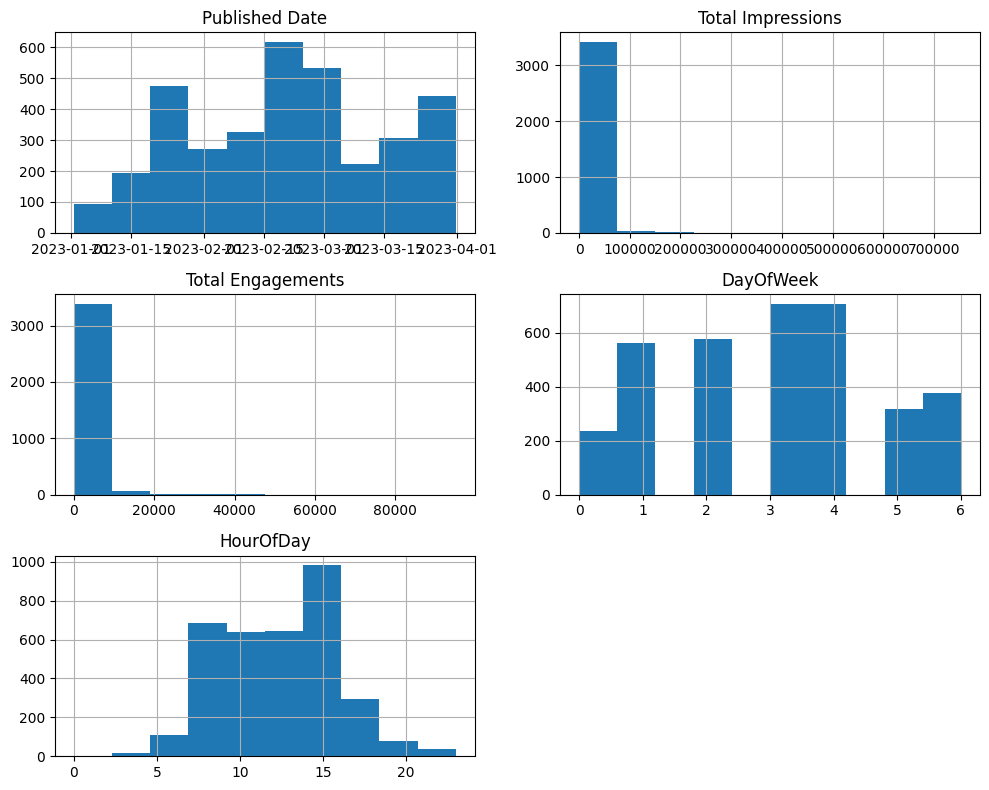

In [ ]:
import matplotlib.pyplot as plt

# Data distribution
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

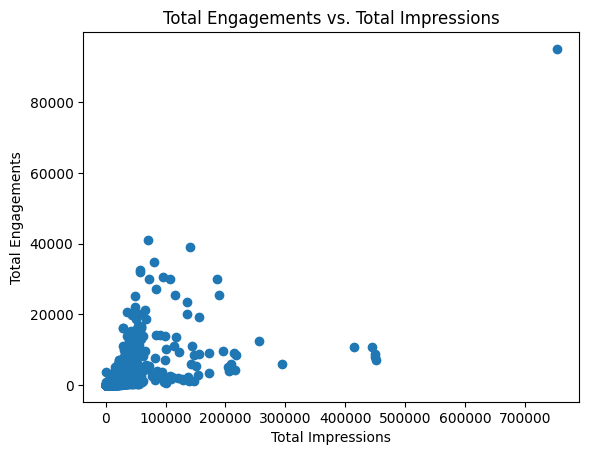

In [ ]:
# Scatter plot of Total Engagements vs. Total Impressions
plt.scatter(df['Total Impressions'], df['Total Engagements'])
plt.xlabel('Total Impressions')
plt.ylabel('Total Engagements')
plt.title('Total Engagements vs. Total Impressions')
plt.show()

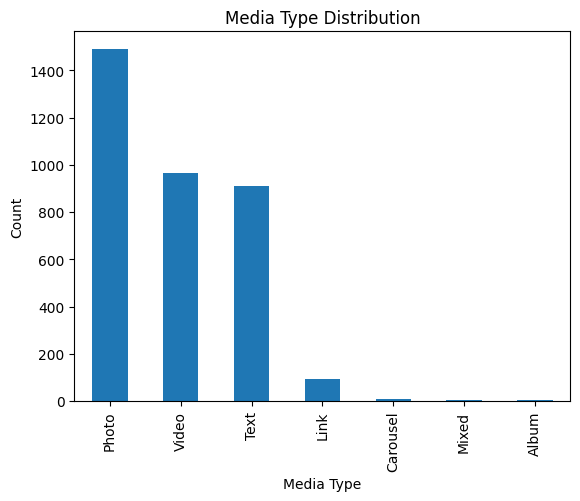

In [ ]:
# Bar plot of Media Type counts
df['Media Type'].value_counts().plot(kind='bar')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.title('Media Type Distribution')
plt.show()

# Question 2: Does day of the week and time of posting affect engagement rates?

In [ ]:
# Convert Published Date column to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'])

In [ ]:
# Extract the day of the week and hour of posting
df['DayOfWeek'] = df['Published Date'].dt.dayofweek
df['HourOfDay'] = df['Published Date'].dt.hour

In [ ]:
print('Day of Week', df['DayOfWeek'].unique())

Day of Week [4 3 2 1 0 6 5]


In [ ]:
# Calculate the average engagement rate by day of the week
engagement_by_day = df.groupby('DayOfWeek')['Total Engagements'].mean()

# Display the average engagement rate by day of the week
print("Average Engagement Rate by Day of the Week:")
print(engagement_by_day)

Average Engagement Rate by Day of the Week:
DayOfWeek
0     710.594017
1    1303.898396
2     780.027826
3    1083.456091
4     907.621469
5     459.855799
6    1051.808511
Name: Total Engagements, dtype: float64


In [ ]:
# Calculate the average engagement rate by hour of the day
engagement_by_hour = df.groupby('HourOfDay')['Total Engagements'].mean()

# Display the average engagement rate by hour of the day
print("Average Engagement Rate by Hour of the Day:")
print(engagement_by_hour)

Average Engagement Rate by Hour of the Day:
HourOfDay
0        0.000000
2      274.000000
3      852.333333
4      459.444444
5     2900.451613
6      750.269231
7     1186.945312
8     1153.156977
9     1217.143229
10    1041.871698
11     791.271505
12     544.202572
13     736.424699
14    1210.969188
15     631.969325
16    1057.602007
17    1247.127660
18     989.710280
19     155.340000
20    1130.038462
21     311.600000
22      19.166667
23      43.550000
Name: Total Engagements, dtype: float64


We can determine whether engagement rates vary depending on the time of posting by grouping the data by the hour of the day and computing the average engagement rate.

Understanding if these variables have an effect on engagement rates may be learned by examining these average engagement rates by day of the week and hour of the day. To ascertain whether the day of the week and the time of posting have an impact on engagement rates in the dataset, we can look for any patterns or trends in the results.

# Question 3: How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [ ]:
# Get unique game titles
game_titles = df['Account'].unique()
game_titles

array(['CSGO', 'General ', 'DOTA2', 'Content Creators', 'Valorant',
       'General'], dtype=object)

In [ ]:
# Calculate total engagements by game title
engagements_by_game = df.groupby('Account')['Total Engagements'].sum()

# Sort the engagements in descending order
engagements_by_game = engagements_by_game.sort_values(ascending=False)

# Display the total engagements by game title
print("Total Engagements by Game Title:")
print(engagements_by_game)

Total Engagements by Game Title:
Account
General             3076479
DOTA2                123990
CSGO                  92336
Content Creators       1387
Valorant                931
General                 849
Name: Total Engagements, dtype: int64


The data is grouped by the game title (Account) using the groupby() function, and the sum of all engagements for each game is determined. We can find the games with the highest overall engagements by arranging the outcomes in descending order.

We can determine which games are performing well in terms of social interaction based on the overall engagements. Games with higher total engagements may reflect greater audience interest and participation. Games with lower overall engagements, on the other hand, can need more attention or strategic focus to enhance their social performance.


We can discover individual games that may need greater marketing efforts, content optimisation, or other techniques to improve their social performance by looking at the overall engagements for each game title. This analysis can guide decision-making on allocating resources and prioritizing games based on their social performance.

# Question 4: What media type performs the best?

In [ ]:
# Get unique media types
media_types = df['Media Type'].unique()

In [ ]:
# Calculate total engagements by media type
engagements_by_media = df.groupby('Media Type')['Total Engagements'].sum()

# Sort the engagements in descending order
engagements_by_media = engagements_by_media.sort_values(ascending=False)

# Display the total engagements by media type
print("Total Engagements by Media Type:")
print(engagements_by_media)

Total Engagements by Media Type:
Media Type
Photo       2167739
Video        859451
Text         246312
Mixed         13664
Carousel       6541
Link           2257
Album             8
Name: Total Engagements, dtype: int64


The data is grouped by media type using the groupby() method, and the sum of all engagements for each kind is computed. We may find the media types with the most overall engagements, such as photos, by descending sorting the results.


It is possible to determine which media type works better in terms of social interaction by looking at the total engagements for each type of media. Higher levels of audience interest and involvement are indicated by the media type with the highest overall engagements.

Understanding how various media forms, such as videos, photos, and articles, perform in terms of generating social engagement may be learned by analysing the total engagements by media type. This information can help guide decision-making on content creation, marketing strategies, and resource allocation based on the effectiveness of different media types in driving social performance.

# Question 5: What is our best performing campaign?

In [ ]:
# Calculate total engagements by campaign
engagements_by_campaign = df.groupby('Campaign Name')['Total Engagements'].sum()

# Sort the engagements in descending order
engagements_by_campaign = engagements_by_campaign.sort_values(ascending=False)

# Display the total engagements by campaign
print("Total Engagements by Campaign:")
print(engagements_by_campaign)

Total Engagements by Campaign:
Campaign Name
Community Engagement     2044767
N/A                      1022773
Evil Exhibited            185305
Evergreen                  43127
Name: Total Engagements, dtype: int64


By grouping the data by the "Campaign Name" column and calculating the sum of total engagements for each campaign, we can determine the social engagement levels of different campaigns. Sorting the results in descending order allows us to identify the campaign with the highest total engagements i.e Community Engagements.

The campaign with the highest total engagements is considered the best performing campaign in terms of social engagement. It indicates a higher level of interest, engagement, or effectiveness in capturing audience attention.

By examining the total engagements for each campaign, we can identify the best performing campaign and gain insights into its success factors. This analysis can guide decision-making regarding campaign strategies, content optimization, and resource allocation to maximize social performance.

# Question 6: Define out a posting strategy for our social channels based on your discoveries.

Based on the discoveries from the dataset analysis, we can define a posting strategy for your social channels. Here are some recommendations based on the insights gained:

Optimal Posting Days: Determine the days of the week that show higher engagement rates. Focus on posting content during these days to maximize audience interaction and reach. Monitor the dataset's analysis of engagement rates by the day of the week and identify the most effective posting days.

Peak Posting Hours: Identify the time of day when engagement rates are higher. Schedule your posts during these peak hours to ensure maximum visibility and engagement. Analyze the dataset's findings on engagement rates by the hour of the day and determine the best posting times.

Emphasize High-Performing Media Types: Identify the media types that perform the best in terms of total engagements. Allocate more resources and focus on creating and promoting content in these high-performing media formats. Refer to the dataset analysis on media type performance to determine the most effective formats for engaging your audience.

Promote Best Performing Campaigns: Identify the best performing campaign based on total engagements. Allocate additional resources and promotional efforts to further enhance the performance of this campaign. Capitalize on its success by creating complementary content, running targeted ads, or leveraging influencers to increase its reach and impact.

Content Optimization: Analyze the dataset to identify patterns and preferences in content that resonates with the audience. Focus on creating content that aligns with these preferences, whether it's specific themes, formats, or messaging styles. Continuously monitor the performance metrics and iterate on content strategies to maximize engagement.

Test and Experiment: Use the dataset analysis as a starting point, but continue to experiment and test different posting strategies. Monitor the performance of your posts, track engagement metrics, and adapt your strategy based on the real-time feedback. Regularly analyze the results and refine your posting strategy accordingly.

Audience Interaction and Engagement: Encourage audience interaction by actively responding to comments, messages, and mentions. Engage with your audience through contests, polls, or user-generated content campaigns. Building a strong relationship with your audience can lead to increased engagement and loyalty.

Performance Tracking and Analytics: Continuously track and measure the performance of your social channels using relevant analytics tools. Monitor key metrics such as engagement rates, reach, click-through rates, and conversions. Regularly review the data and make data-driven decisions to optimize your posting strategy.

Remember that social media strategies should be adaptable and flexible. It's essential to monitor the performance of your social channels, stay updated with the latest trends and changes in your industry, and adjust your strategy as needed to stay relevant and drive optimal results.

#Question 7: What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?

Expanding your social media presence can be a strategic move to reach a wider audience and maximize your brand's visibility. Here are some suggestions for the social media team if they want to expand their presence:

Assess Platform Relevance: Evaluate the relevance and suitability of different social media platforms based on your target audience and the nature of your content. Consider factors such as demographics, user behavior, and content format to determine which platforms align well with your goals.

Leverage Successful Channels: If your CSGO YouTube channel is performing well, consider expanding to other platforms that complement video content, such as TikTok. Repurpose or create shorter, engaging clips or highlights from your YouTube channel to cater to the TikTok audience. Capitalize on the success of your YouTube channel and leverage it to grow your presence on other platforms.

Understand Platform Differences: Each social media platform has its own unique features, audience demographics, and content formats. Take the time to understand these differences and adapt your content strategy accordingly. Tailor your content to fit the specific requirements and preferences of each platform while maintaining a consistent brand identity.

Research and Experiment: Conduct thorough research on the platform you are considering expanding to. Understand its user base, content trends, and engagement patterns. Experiment with different types of content and engagement strategies to gauge the response of the audience on that platform. Use analytics and performance metrics to track your progress and make data-driven decisions.

Cross-Promotion and Integration: Cross-promote your presence on different platforms to leverage the existing audience and increase visibility. Promote your TikTok content on your YouTube channel and vice versa. Use social media bio sections and profile descriptions to highlight your presence on other platforms. Encourage your audience to follow you across multiple channels to stay updated on all your content.

Tailor Content to Platform: Customize your content to suit the platform you are expanding to. Each platform has its own content formats, such as short videos on TikTok, visual images on Instagram, or concise updates on Twitter. Adapt your content strategy to fit these formats while staying true to your brand's voice and values.

Engage with the Community: Actively engage with the community on the new platform. Interact with users, respond to comments, and participate in relevant discussions. Building a strong presence and establishing connections with the audience will help grow your following and increase your reach.

Monitor and Evaluate: Continuously monitor the performance of your expanded presence on different platforms. Analyze engagement metrics, follower growth, and audience feedback. Evaluate the impact and return on investment from each platform and adjust your strategies accordingly. Stay agile and responsive to the ever-changing social media landscape.

Expanding your presence to new social media platforms can open up new opportunities and broaden your audience reach. However, it's important to consider your resources, content production capabilities, and the alignment of each platform with your brand identity. Strategic planning, research, experimentation, and data analysis will guide your decision-making process and help you make informed choices when expanding your social media presence.